<a href="https://colab.research.google.com/github/graumannm/Berlin_Bike_CV/blob/main/s04_tSNE_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# file names and paths
model_name = 'dinoS14'
dataset = 'bikelanes'
data_dir  = '/gdrive/My Drive/berlin_bike_CV/final_project_first_images/labelled images/'

## Setup

In [19]:
from google.colab import drive
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances, cosine_similarity
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from sklearn.manifold import TSNE
import pickle
from mpl_toolkits.mplot3d import Axes3D

In [3]:
drive.mount('/gdrive')

Mounted at /gdrive


## Load clustering results

In [4]:
# load pickled embeddings from gdrive

# Path to the pickle file
file_path = data_dir + model_name + '_' + dataset + "_embeddings.pickle"

# Load the dictionary from the pickle file
with open(file_path, "rb") as myfile:
    img_embedding_dict = pickle.load(myfile)

# load cluster assingment vecto
cluster_path = data_dir + model_name + '_' + dataset + "_cluster_assignment.pickle"
with open(cluster_path, "rb") as myfile:
    cluster_vec = pickle.load(myfile)

## Visually explore clustering results

In [5]:
# sort data for convenience
X = []
images = []
for image, embedding in img_embedding_dict.items():
    X.append(embedding) # embedding matrix

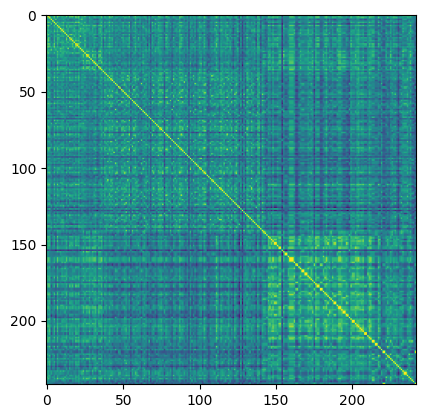

In [13]:
# construct distance matrix
dist_cos = cosine_similarity(X)

# plot similarity matrix as check
plt.imshow(dist_cos)

### Run t-SNE in 2D

In [7]:
# make embeddings array
embeddings_list = X
n_samples = len(embeddings_list)
embedding_dim = len(embeddings_list[0])

# empty array to store the embeddings
embeddings_array = np.empty((n_samples, embedding_dim))

# fill array with embeddings from list
for i, embedding in enumerate(embeddings_list):
    embeddings_array[i] = embedding

In [8]:
# instantiate and run t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_array)

### Plot t-SNE result

<ipython-input-14-6438380f0845>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('winter', len(unique_clusters))


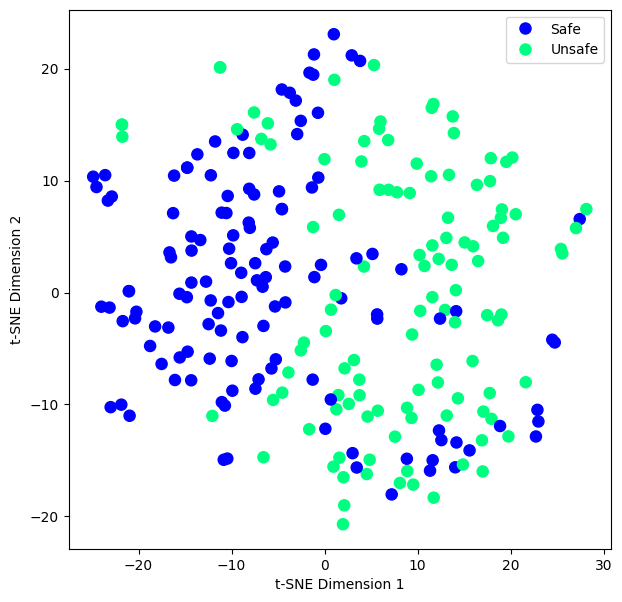

In [14]:
cluster_labels = np.array(cluster_vec)

# create a list of unique clusters
unique_clusters = np.unique(cluster_labels)

# color map based on number of unique clusters
color_map = plt.cm.get_cmap('winter', len(unique_clusters))
size = np.ones(len(cluster_vec))*64 # dot size

# open figure
fig = plt.figure(figsize=(7, 7))

# plot scatter plot with color-coded clusters
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap=color_map, s=size)

# legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Safe', markerfacecolor=color_map(0), markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Unsafe', markerfacecolor=color_map(1), markersize=10)
]

plt.legend(handles=legend_elements, loc='upper right')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

### Plot this with images instead of dots

In [11]:
# create list of original images where dots used to be
image_list = []
bike_dir  = '/gdrive/My Drive/berlin_bike_CV/final_project_first_images/labelled images/bikelanes/'

# define image transformations
transform = transforms.Compose([transforms.Resize(256)])

for fname, features in img_embedding_dict.items():

  # load current image as PIL.Image.Image
  img = Image.open(bike_dir + fname)

  # convert image into right format and resize
  img_t = transform(img)

  # save in list
  image_list.append(img_t)

<ipython-input-18-cd11365834c5>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('winter', len(unique_clusters))


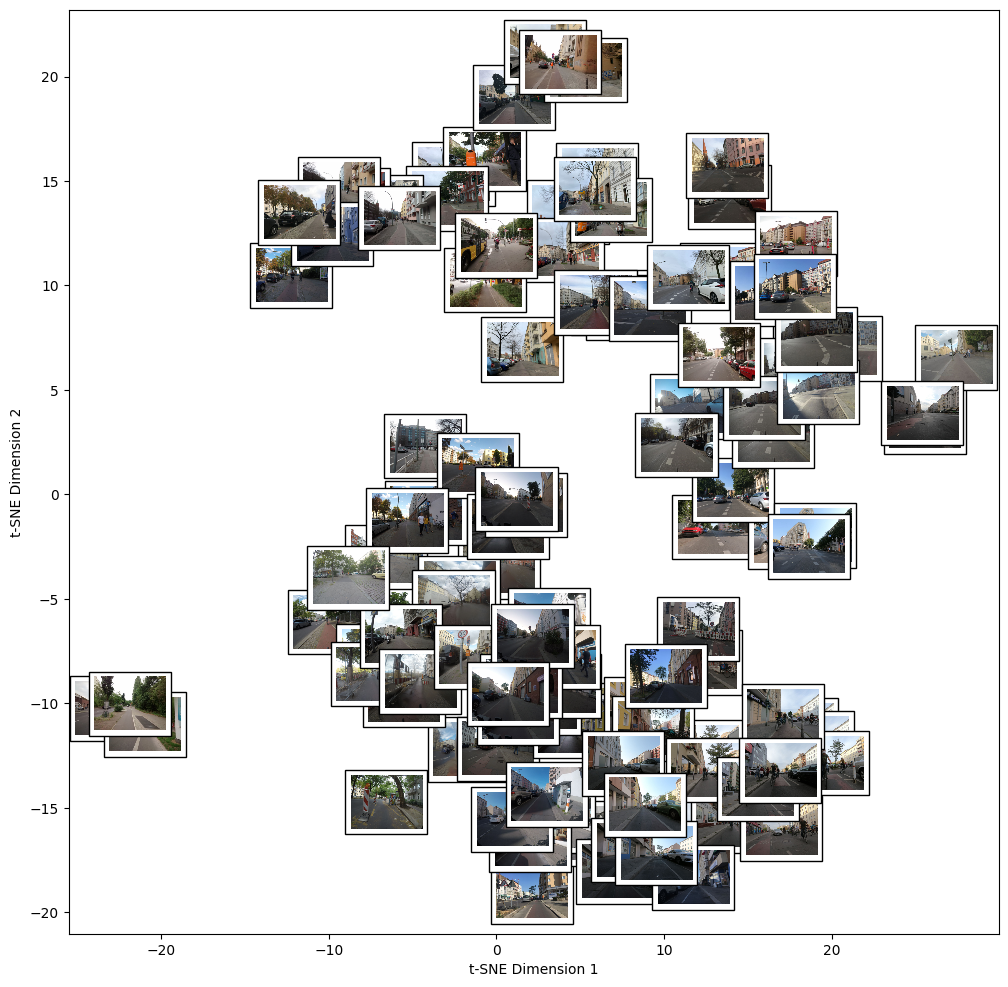

In [18]:
# Plot t-SNE with images where dots were

# just visualize a few images, otherwise nothing is visible. All images are 241
img_len = 120
cluster_labels = np.array(cluster_vec[:img_len])

# create a list of unique clusters
unique_clusters = np.unique(cluster_labels)

# color map based on number of unique clusters
color_map = plt.cm.get_cmap('winter', len(unique_clusters))

# open figure
fig = plt.figure(figsize=(12, 12))

# scatter plot with color-coded clusters
scatter = plt.scatter(embeddings_2d[:img_len, 0], embeddings_2d[:img_len, 1], c=cluster_labels, cmap=color_map)

# iterate over embeddings and corresponding images
counter = 0
for i, embedding in enumerate(embeddings_2d):
    counter +=1
    if counter >= img_len:
      break
    image = image_list[i]
    imagebox = OffsetImage(image, zoom=0.15)
    ab = AnnotationBbox(imagebox, embedding)
    plt.gca().add_artist(ab)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

## Run t-SNE in 3D and visualize result

<ipython-input-20-991726b67537>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('winter', len(unique_clusters))


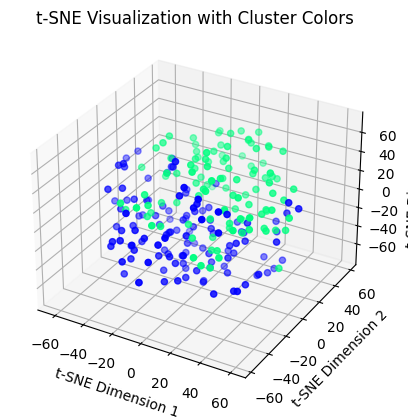

In [20]:
n_samples = len(embeddings_list)
embedding_dim = len(embeddings_list[0])

# empty array to store embeddings
embeddings_array = np.empty((n_samples, embedding_dim))

#  array with the embeddings from list
for i, embedding in enumerate(embeddings_list):
    embeddings_array[i] = embedding

# instantiate and run t-SNE in three dimensions
tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings_array)

cluster_labels = np.array(cluster_vec)

# list of unique clusters
unique_clusters = np.unique(cluster_labels)

# color map
color_map = plt.cm.get_cmap('winter', len(unique_clusters))

# open figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=cluster_labels, cmap=color_map)

ax.set_title('t-SNE Visualization with Cluster Colors')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')

plt.show()